In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import scipy.stats

from Configuration import Configuration
from NeuralTract import NeuralTract

In [2]:
conf = Configuration('confNeuralTractSpikes.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [4]:
pools = dict()
pools[0] = NeuralTract(conf, 'CMExt')

tic = time.clock()
for i in xrange(0,len(t)-1):
    pools[0].atualizePool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

Descending Command CMExt built
133.328735 seconds


In [5]:
pools[0].listSpikes()

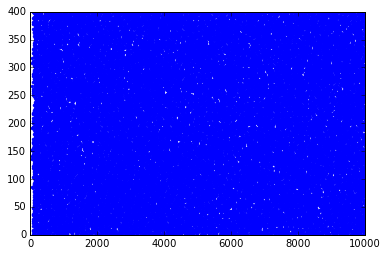

In [6]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')

In [7]:
ISI = np.array([])
for i in xrange(0,len(pools[0].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[0].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
    

(array([  2.24000000e+02,   3.66600000e+03,   9.19400000e+03,
          8.28000000e+03,   4.18700000e+03,   1.40200000e+03,
          3.51000000e+02,   8.90000000e+01,   2.10000000e+01,
          2.00000000e+00]),
 array([  17.2 ,   56.64,   96.08,  135.52,  174.96,  214.4 ,  253.84,
         293.28,  332.72,  372.16,  411.6 ]),
 <a list of 10 Patch objects>)

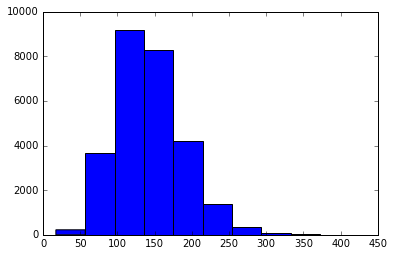

In [8]:
plt.figure()
plt.hist(ISI)

In [9]:
SD = np.std(ISI)
M = np.mean(ISI)
SK = scipy.stats.skew(ISI)
CV = SD / M

print 'ISI Mean = ' + str(M)
print 'ISI Standard deviation = ' + str(SD)
print 'ISI Skewness = ' + str(SK)
print 'ISI CV = ' + str(CV)

ISI Mean = 142.677613437
ISI Standard deviation = 45.1604501319
ISI Skewness = 0.650014842098
ISI CV = 0.316520924649


In [10]:
M_FR = 1000.0 / M
SD_FR = np.sqrt((SD**2) * 1000 / (M**3) + 1/6.0 + (SD**4) / (2*M**4) - SK/(3*M**3))


print 'Firing rate mean = ' + str(M_FR)
print 'Firing rate standard deviation = ' + str(SD_FR)

Firing rate mean = 7.00880801065
Firing rate standard deviation = 0.934808035879


In [11]:
CV_FR = SD_FR / M_FR
print 'CV of Firing rate = ' + str(CV_FR)

CV of Firing rate = 0.133376179581
